In [ ]:
%pip install -U scikit-learn

In [1]:
import joblib
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from yellowbrick.cluster import SilhouetteVisualizer
from yellowbrick.datasets import load_nfl

In [13]:
# carico il dataframe preprocessato

df_corr= joblib.load('dataframe_processato.joblib')

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\

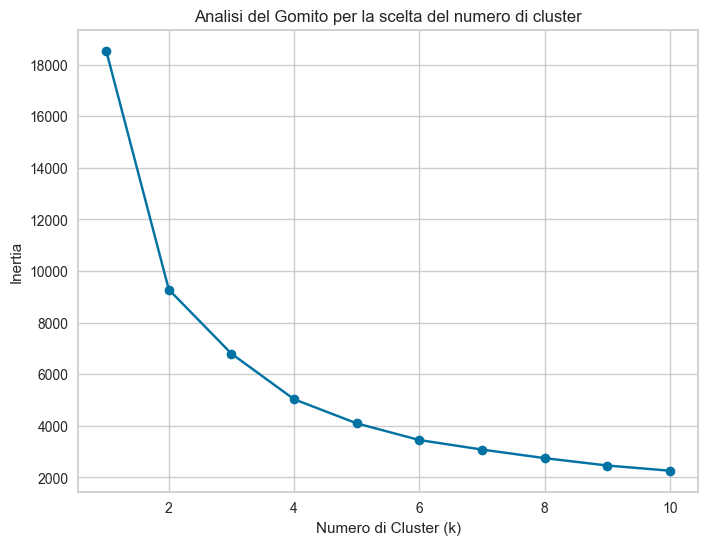

In [17]:
# metodo del gomito per individuare il numero di k ottimale

# Calcola l'inertia (somma dei quadrati delle distanze dai centroidi) per diversi valori di k

colonnes_per_kmeans = ['yellow_cards', 'goals', 'minutes_played']
df_kmeans = df_corr[colonnes_per_kmeans]


# Standardizza le colonne per avere media zero e deviazione standard uno
scaler = StandardScaler()
df_kmeans_scaled = scaler.fit_transform(df_kmeans)


inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_kmeans_scaled)
    inertia.append(kmeans.inertia_)
 
# Traccia il grafico dell'analisi del gomito
plt.figure(figsize=(8, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Numero di Cluster (k)')
plt.ylabel('Inertia')
plt.title('Analisi del Gomito per la scelta del numero di cluster')
plt.savefig("../../images/clustering/kmeans/elbow_method.png")
plt.show()

c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\nicol\AppData\Local\Temp\ipykernel_11452\1155960082.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = kmeans.labels_
c:\Users\nicol\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


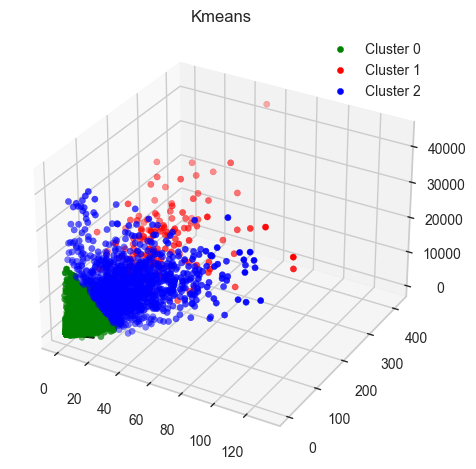

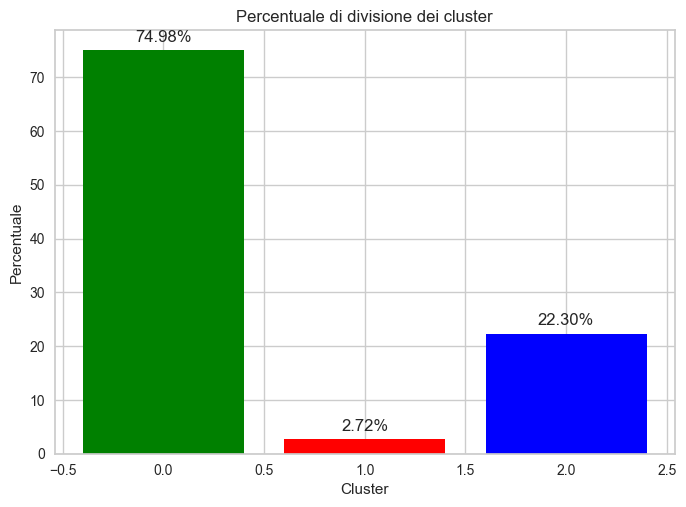

In [20]:
# avviamo il kmeans con 3

k = 3
 
# inizializziamo l'algoritmo K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
 
# eseguiamo l'addestramento del modello
kmeans.fit(df_kmeans_scaled)

centroids = kmeans.cluster_centers_

# aggiungiamo le etichette dei cluster al DataFrame originale
df_kmeans['cluster'] = kmeans.labels_

data1 = df_kmeans[df_kmeans.cluster==0]
data2 = df_kmeans[df_kmeans.cluster==1]
data3 = df_kmeans[df_kmeans.cluster==2]

kplot = plt.axes(projection='3d')
xline = np.linspace(0, 15, 1000)
yline = np.linspace(0, 15, 1000)
zline = np.linspace(0, 15, 1000)
 
kplot.plot3D(xline, yline, zline, 'black')
# Data for three-dimensional scattered points
kplot.scatter3D(data1.yellow_cards, data1.goals, data1.minutes_played, c='green', label = 'Cluster 0')
kplot.scatter3D(data2.yellow_cards,data2.goals,data2.minutes_played,c ='red', label = 'Cluster 1')
kplot.scatter3D(data3.yellow_cards,data3.goals,data3.minutes_played,c ='blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color = 'indigo')
plt.legend()
plt.title("Kmeans")
plt.savefig("../../images/clustering/kmeans/k_means.png")
plt.show()

# qui di seguitop stampiamo il grafico per vedere i valori percentuali dei cluster

# Calcola le percentuali di divisione dei cluster
cluster_counts = df_kmeans['cluster'].value_counts()
total_samples = len(df_kmeans)
cluster_percentages = cluster_counts / total_samples * 100


plt.bar(cluster_percentages.index, cluster_percentages, color=["green", "blue", "red"])
 
# Aggiungi valori percentuali sull'asse y
for cluster, percentage in cluster_percentages.items():
    plt.text(cluster, percentage + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Aggiungi etichette e titoli
plt.xlabel('Cluster')
plt.ylabel('Percentuale')
plt.title('Percentuale di divisione dei cluster')
#plt.savefig("../../images/clustering/kmeans/numerosità_cluster.png") #commentata perche modificati a mano i valori sulle x
# Mostra il grafico
plt.show()


Silhouette Score: 0.59


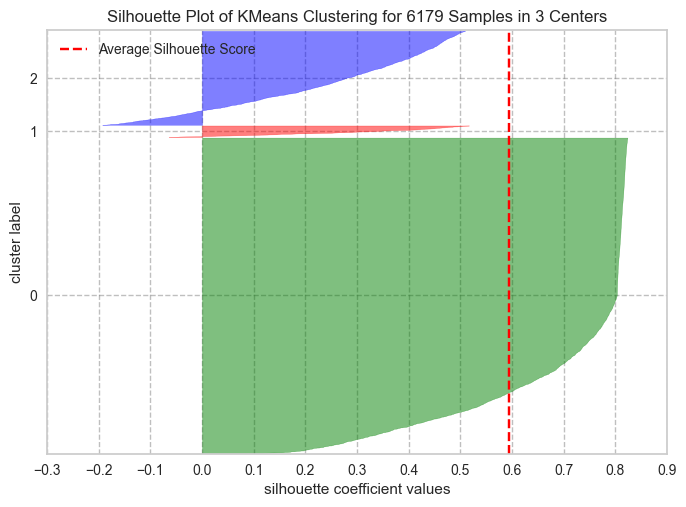

<Figure size 800x550 with 0 Axes>

In [22]:
# valutiamo i risultati usando la metrica silhouette

visualizer = SilhouetteVisualizer(kmeans, colors=['green', 'red', 'blue'])

visualizer.fit(df_kmeans_scaled)        # Fit the data to the visualizer

# stampa il valore di silhouette
silhouette_score = visualizer.silhouette_score_
print(f"Silhouette Score: {silhouette_score:.2f}")

ax = visualizer.ax

ax.grid(True, linestyle='--', alpha=0.5, color='grey')


# Mostra il grafico con l'oggetto Axes personalizzato
visualizer.show(ax=ax)
plt.savefig("../../images/clustering/kmeans/kmeans_silhoutte.png")



In [23]:
# in questo blocco andiamo a ricavare i valori massimi e minimi di ciascun campo per ogni cluster, per capire quali sono i giocatori che li popolano
# Calcola il massimo e il minimo per ogni colonna e per ogni cluster
for cluster in range(k):
    cluster_data = df_kmeans[df_kmeans['cluster'] == cluster]
    max_values = cluster_data.max()
    min_values = cluster_data.min()
 
    print(f'\nCluster {cluster}:\n')
 
    for column in df_kmeans.columns[:-1]:  # Ignora l'ultima colonna 'cluster'
        print(f'Massimo di {column}: {max_values[column]:.2f}')
        print(f'Minimo di {column}: {min_values[column]:.2f}\n')


Cluster 0:

Massimo di yellow_cards: 32.00
Minimo di yellow_cards: 0.00

Massimo di goals: 52.00
Minimo di goals: 0.00

Massimo di minutes_played: 18910.00
Minimo di minutes_played: 1.00


Cluster 1:

Massimo di yellow_cards: 131.00
Minimo di yellow_cards: 7.00

Massimo di goals: 418.00
Minimo di goals: 56.00

Massimo di minutes_played: 43689.00
Minimo di minutes_played: 10731.00


Cluster 2:

Massimo di yellow_cards: 122.00
Minimo di yellow_cards: 3.00

Massimo di goals: 68.00
Minimo di goals: 0.00

Massimo di minutes_played: 42229.00
Minimo di minutes_played: 5591.00

